### Hospital

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pandas as pd

In [3]:
df = pd.read_csv("networks/detailed_list_of_contacts_Hospital.dat",
                 delim_whitespace=True,
                 index_col=0)
G = nx.from_pandas_edgelist(df=df,
                            source="i",
                            target="j",
                            edge_attr=["Si", "Sj"]
                            )

In [4]:
# distribuição empírica (faça um gráfico com
# as diferentes redes).

n_V = G.number_of_nodes()
n_E = G.number_of_edges()
print(f"Number of nodes: {n_V}")
print(f"Number of edges: {n_E}")
print(f"Directed graph: {nx.is_directed(G)}")
print(f"Connected graph: {nx.is_connected(G)}")
print(f"Connected components: {nx.number_connected_components(G)}")

Number of nodes: 75
Number of edges: 1139
Directed graph: False
Connected graph: True
Connected components: 1


In [5]:
# Degree
degrees = np.array([int(dg) for (node, dg) in G.degree()])
print(f"Max: {degrees.max()}")
print(f"Min: {degrees.min()}")
print(f"Mean: {degrees.mean()}")
print(f"Median: {np.median(degrees)}")
print(f"Std: {degrees.std()}")


Max: 61
Min: 6
Mean: 30.373333333333335
Median: 27.0
Std: 15.017122079664784


In [6]:
# Distance
if nx.is_connected(G):
    d_mean = nx.average_shortest_path_length(G)
    print(f"{d_mean}")

dist = dict(nx.all_pairs_shortest_path_length(G))
distas = list()
for i in dist.values():
    distas = distas+list(i.values())
distas = np.array(distas)
distas = distas[distas != 0]
print(f"Max: {distas.max()}")
print(f"Min: {distas.min()}")
print(f"Mean: {distas.mean()}")
print(f"Median: {np.median(distas)}")
print(f"Std: {distas.std()}")

1.597837837837838
Max: 3
Min: 1
Mean: 1.597837837837838
Median: 2.0
Std: 0.5069559488395353


In [7]:
# Connected components
print(f"N connected components: {nx.number_connected_components(G)}")
cc = np.array([len(c) for c in nx.connected_components(G)])
print(f"Max: {cc.max()}")
print(f"Min: {cc.min()}")
print(f"Mean: {cc.mean()}")
print(f"Median: {np.median(cc)}")
print(f"Std: {cc.std()}")

N connected components: 1
Max: 75
Min: 75
Mean: 75.0
Median: 75.0
Std: 0.0


In [8]:
# Cluster
cluster = np.array(list(nx.clustering(G).values()))
print(f"Max: {cluster.max()}")
print(f"Min: {cluster.min()}")
print(f"Mean: {cluster.mean()}")
print(f"Median: {np.median(cluster)}")
print(f"Std: {cluster.std()}")
print(f"Global: {nx.transitivity(G)}")

Max: 0.9555555555555556
Min: 0.21666666666666667
Mean: 0.6402796539914467
Median: 0.6493506493506493
Std: 0.1279629850615692
Global: 0.5880037219955623


In [9]:
# Degree centrality
dc = np.array(list(nx.degree_centrality(G).values()))
print(f"Max: {dc.max()}")
print(f"Min: {dc.min()}")
print(f"Mean: {dc.mean()}")
print(f"Median: {np.median(dc)}")
print(f"Std: {dc.std()}")

Max: 0.8243243243243243
Min: 0.08108108108108109
Mean: 0.41045045045045053
Median: 0.3648648648648649
Std: 0.2029340821576322


In [10]:
# Betweeness centrality
bc = np.array(list(nx.betweenness_centrality(G).values()))
print(f"Max: {bc.max()}")
print(f"Min: {bc.min()}")
print(f"Mean: {bc.mean()}")
print(f"Median: {np.median(bc)}")
print(f"Std: {bc.std()}")

Max: 0.040408304449621735
Min: 3.6587756168739245e-05
Mean: 0.008189559422436135
Median: 0.0036521778576242775
Std: 0.00954376020777635


In [11]:
# Closeness centrality
cloc = np.array(list(nx.closeness_centrality(G).values()))
print(f"Max: {cloc.max()}")
print(f"Min: {cloc.min()}")
print(f"Mean: {cloc.mean()}")
print(f"Median: {np.median(cloc)}")
print(f"Std: {cloc.std()}")

Max: 0.8505747126436781
Min: 0.4966442953020134
Mean: 0.6377306894522918
Median: 0.6115702479338843
Std: 0.08974930910933497


In [12]:
# Eigenvector centrality
ec = np.array(list(nx.eigenvector_centrality(G).values()))
print(f"Max: {ec.max()}")
print(f"Min: {ec.min()}")
print(f"Mean: {ec.mean()}")
print(f"Median: {np.median(ec)}")
print(f"Std: {ec.std()}")

Max: 0.19022428951343223
Min: 0.02177293274188552
Mean: 0.1053455336719825
Median: 0.1030396594193674
Std: 0.047282680430560796


In [27]:
# Katz centrality
kc = np.array(list(nx.katz_centrality_numpy(G, 0.03).values()))
print(f"Max: {kc.max()}")
print(f"Min: {kc.min()}")
print(f"Mean: {kc.mean()}")
print(f"Median: {np.median(kc)}")
print(f"Std: {kc.std()}")

Max: 0.19528500661252965
Min: 0.010187150111579746
Mean: 0.10299886703904453
Median: 0.10155676130021356
Std: 0.05219738232906475


In [14]:
# PageRank centrality
pr = np.array(list(nx.pagerank(G).values()))
print(f"Max: {pr.max()}")
print(f"Min: {pr.min()}")
print(f"Mean: {pr.mean()}")
print(f"Median: {np.median(pr)}")
print(f"Std: {pr.std()}")

Max: 0.025364303415755678
Min: 0.0043508885821422465
Mean: 0.013333333333333334
Median: 0.012127868616582322
Std: 0.005708895843947464


In [15]:
# VoteRank centrality
vr = np.array(nx.voterank(G))
print(f"Max: {vr.max()}")
print(f"Min: {vr.min()}")
print(f"Mean: {vr.mean()}")
print(f"Median: {np.median(vr)}")
print(f"Std: {vr.std()}")

Max: 1769
Min: 1098
Mean: 1276.6078431372548
Median: 1207.0
Std: 174.5802897968268


In [16]:
# Jaccard similarity
jaccard = np.array(list(p for (u, v, p) in nx.jaccard_coefficient(G)))
print(f"Max: {jaccard.max()}")
print(f"Min: {jaccard.min()}")
print(f"Mean: {jaccard.mean()}")
print(f"Median: {np.median(jaccard)}")
print(f"Std: {jaccard.std()}")


Max: 0.7352941176470589
Min: 0.0
Mean: 0.2566824483278312
Median: 0.2413793103448276
Std: 0.1291303232539603


In [17]:
# Coefficient Adamic/Adar
caa = np.array(list(p for (u, v, p) in nx.adamic_adar_index(G)))
print(f"Max: {caa.max()}")
print(f"Min: {caa.min()}")
print(f"Mean: {caa.mean()}")
print(f"Median: {np.median(caa)}")
print(f"Std: {caa.std()}")

Max: 11.883722533667907
Min: 0.0
Mean: 2.8305780539045573
Median: 2.5564473168339714
Std: 1.782811826926038


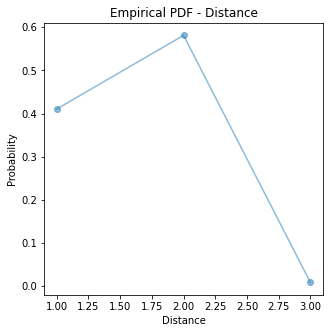

In [18]:
# pdf
x, f_k = np.unique(distas, return_counts=True)
pdf = f_k/f_k.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical PDF - Distance')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x, pdf, alpha=0.5)
plt.plot(x, pdf, alpha=0.5)
plt.show()

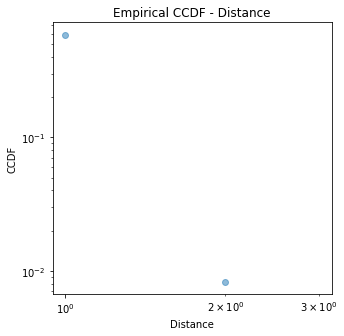

In [19]:
# CCDF
cdf = f_k.cumsum()/f_k.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x, ccdf, alpha=0.5)
plt.title('Empirical CCDF - Distance')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance')
plt.ylabel('CCDF')

plt.show()

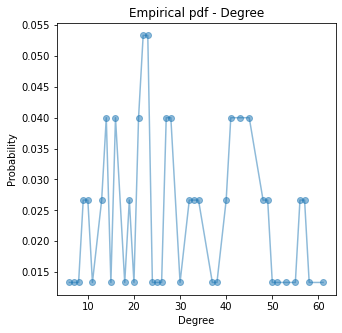

In [20]:
# pdf
x_g, f_k_g = np.unique(degrees, return_counts=True)
pdf_g = f_k_g/f_k_g.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical pdf - Degree')
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.scatter(x_g, pdf_g, alpha=0.5)
plt.plot(x_g, pdf_g, alpha=0.5)
plt.show()

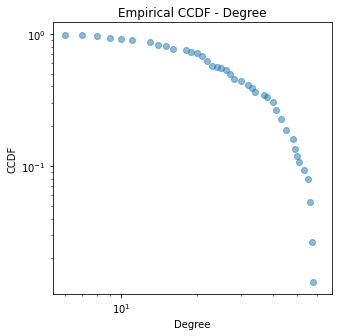

In [21]:
# CCDF
cdf_g = f_k_g.cumsum()/f_k_g.sum()
ccdf_g = 1-cdf_g

plt.figure(figsize=(5,5))
plt.scatter(x_g, ccdf_g, alpha=0.5)
plt.title('Empirical CCDF - Degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.show()

In [22]:
np.savetxt('data/hospital-dista-x.txt', x, delimiter=',', fmt='%d')
np.savetxt('data/hospital-dista-pdf.txt', pdf, delimiter=',', fmt='%f')
np.savetxt('data/hospital-dista-ccdf.txt', ccdf, delimiter=',', fmt='%f')

np.savetxt('data/hospital-degree-x.txt', x_g, delimiter=',', fmt='%d')
np.savetxt('data/hospital-degree-pdf.txt', pdf_g, delimiter=',', fmt='%f')
np.savetxt('data/hospital-degree-ccdf.txt', ccdf_g, delimiter=',', fmt='%f')
